### Pertama kita mengimport library yang akan digunakan disini kita bakal sering menggunakan tensorflow dan turunannya keras

In [23]:
import tensorflow as tf
from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders

### Setelah mengimport library kita membuat splitfolder untuk letak menyimpan gambar yang sudah dilatih
#### Disclaimer file zip gambar yang saya gunakan sudah mengalami perubahan dari yang awalnya 50 kelas menjadi 10 kelas saja

In [2]:
splitfolders.ratio("imgs/imgs/",
                   output="dataset_final",
                   seed=1337,
                   ratio=(.8,.1,.1))

### disini kita melakukan preprocessing format untuk model gambar

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    brightness_range=[0.9,1.1],
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1/255
)

### setelah menentukan format gambar kita memisahkan gambar yang dilatih dengan validasi nya

In [4]:
train_generator = train_datagen.flow_from_directory(
    'dataset_final/train',
    target_size =(150,150),
    batch_size = 32,
    class_mode='categorical'

)

val_generator = val_datagen.flow_from_directory(
    'dataset_final/val',
    target_size =(150,150),
    batch_size = 32,
    class_mode='categorical'

)

Found 715 images belonging to 10 classes.
Found 86 images belonging to 10 classes.


### untuk layer model pelatihannya seperti dibawah ini

In [5]:
model = Sequential([
    # 1. feature extraction layer
    Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # 2. fully connected layer
    Flatten(),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax'),
])

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### jika ingin menggunakan modelnya maka kita tidak perlu menjalankan membuat layer yang sebelumnya cukup jalan load_model()

In [ ]:
# model = load_model('model2.h5')

### Setelah membuat model pelatihannya disini saya membuat sebuah fungsi agar saat val_accuracy menyentuh 0.93 maka training akan berhenti

In [6]:
class StopOnPoint(tf.keras.callbacks.Callback):
    def __init__(self, point):
        super(StopOnPoint, self).__init__()
        self.point = point

    def on_epoch_end(self, epoch, logs=None): 
        accuracy = logs["val_accuracy"]
        if accuracy >= self.point:
            self.model.stop_training = True

callbackss = [StopOnPoint(0.93)]

### Setelah membuat fungsi diatas kita tinggal terapkan saja ke dalam parameter ccallbacks

In [7]:
history = model.fit(train_generator,epochs=250,
          validation_data=val_generator,
          verbose=1,
          callbacks=callbackss)

Epoch 1/250
23/23 [==============================] - 20s 808ms/step - loss: 2.3127 - accuracy: 0.0867 - val_loss: 2.3022 - val_accuracy: 0.1047
Epoch 2/250
23/23 [==============================] - 15s 636ms/step - loss: 2.3030 - accuracy: 0.0979 - val_loss: 2.3013 - val_accuracy: 0.1047
Epoch 3/250
23/23 [==============================] - 15s 648ms/step - loss: 2.3028 - accuracy: 0.0923 - val_loss: 2.3018 - val_accuracy: 0.1047
Epoch 4/250
23/23 [==============================] - 16s 685ms/step - loss: 2.3021 - accuracy: 0.0923 - val_loss: 2.2965 - val_accuracy: 0.1628
Epoch 5/250
23/23 [==============================] - 17s 745ms/step - loss: 2.2983 - accuracy: 0.1063 - val_loss: 2.2993 - val_accuracy: 0.1047
Epoch 6/250
23/23 [==============================] - 17s 709ms/step - loss: 2.2914 - accuracy: 0.1217 - val_loss: 2.2460 - val_accuracy: 0.1512
Epoch 7/250
23/23 [==============================] - 15s 649ms/step - loss: 2.2607 - accuracy: 0.1427 - val_loss: 2.2337 - val_accuracy:

Setelah melatih model karena val_accuracy tidak mencapai harapan maka training dilakukan sampai menyentuh epoch

#### Karena saya takut model saya ngulang jadi saya melakukan save model
#### untuk link downloadnya https://drive.google.com/file/d/1_WBXRxlMS6k_OE6JSj2Iq4Txa6fyyl_w/view?usp=sharing

In [8]:
# model.save("model.h5")

E:\Kuliah\Kecerdasan Buatan\venv_A1-23\Anan_023\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Mengevaluasi model

In [19]:
model.evaluate(train_generator)

23/23 [==============================] - 17s 765ms/step - loss: 0.1556 - accuracy: 0.9510


[0.15555724501609802, 0.9510489702224731]

### Untuk membuat grafik garis pertama kita perlu memanggil library dari matplotlib.pyplot

In [10]:
import matplotlib.pyplot as plt

### berikut adalah grafik perbandingan accuracy dan loss dari train dan test 

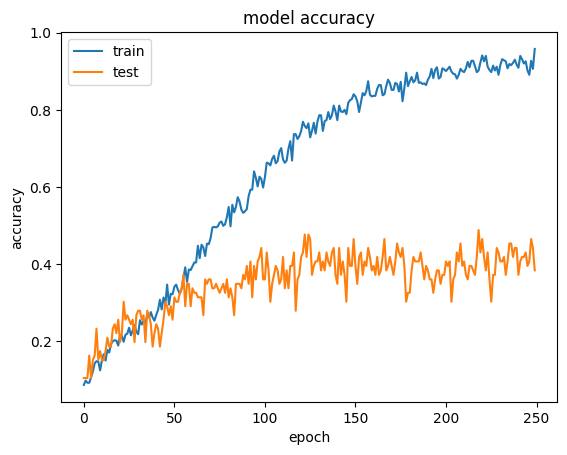

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

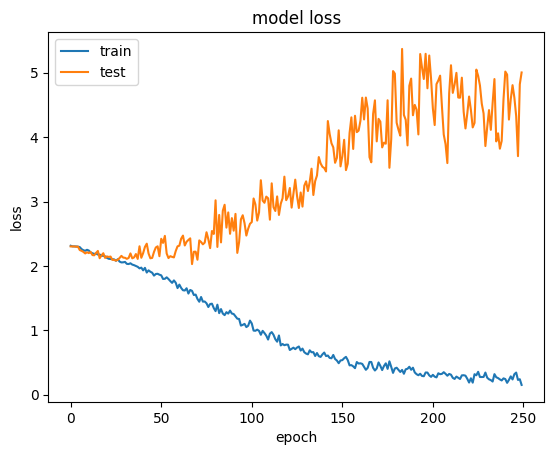

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()